## Dataset:
https://www.kaggle.com/datasets/preetviradiya/covid19-radiography-dataset

You don't have to download the entire dataset for the bootcamp.

All you need is already on GitHub.

## Imports

In [ ]:
!python -m pip install --upgrade pip
!pip install opencv-contrib-python numpy pandas matplotlib os ipython

In [3]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [4]:
# import ipywidgets as widgets          
# from ipywidgets import HBox, VBox
# from ipywidgets import interact, interactive, fixed, interact_manual

## the following two lines will expand the visible area:
from IPython.display import display, HTML ##pip install ipython
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
def showme(frame,title=None):
    #window_title = "map"
    cv2.namedWindow(title, cv2.WINDOW_NORMAL) #open a window
    cv2.imshow(title, frame)                  #show the image in that widow
    cv2.waitKey(0)                            #wait for any key
    cv2.destroyAllWindows()                   #close everything

def showplt(image, title=None, pltnative=False, custSize=[100,10], cmap='gray'):
    plt.figure(figsize = (custSize))
    if pltnative:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(image[...,::-1], cmap=cmap)
    plt.title(title)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

## SETUP

In [6]:
## identify folders:

covid_folder = os.path.join("..","data","COVID-19_Radiography_Dataset", "COVID")
covid_annotations_folder = os.path.join("..","data","COVID-19_Radiography_Dataset", "COVID - Annotations")
normal_folder = os.path.join("..","data", "COVID-19_Radiography_Dataset","Normal")


In [7]:
os.listdir(covid_folder)

['COVID-1.png',
 'COVID-1010.png',
 'COVID-1011.png',
 'COVID-1012.png',
 'Thumbs.db']

## Reading Images

In [8]:
# this is the NAME of the file that we work with. 
# files with same name sit in different folders.

image_file_name = "COVID-1010.png"

In [9]:
# read both images :

co1010_orig = cv2.imread(os.path.join(covid_folder ,image_file_name ))
co1010_anno = cv2.imread(os.path.join(covid_annotations_folder ,image_file_name ))


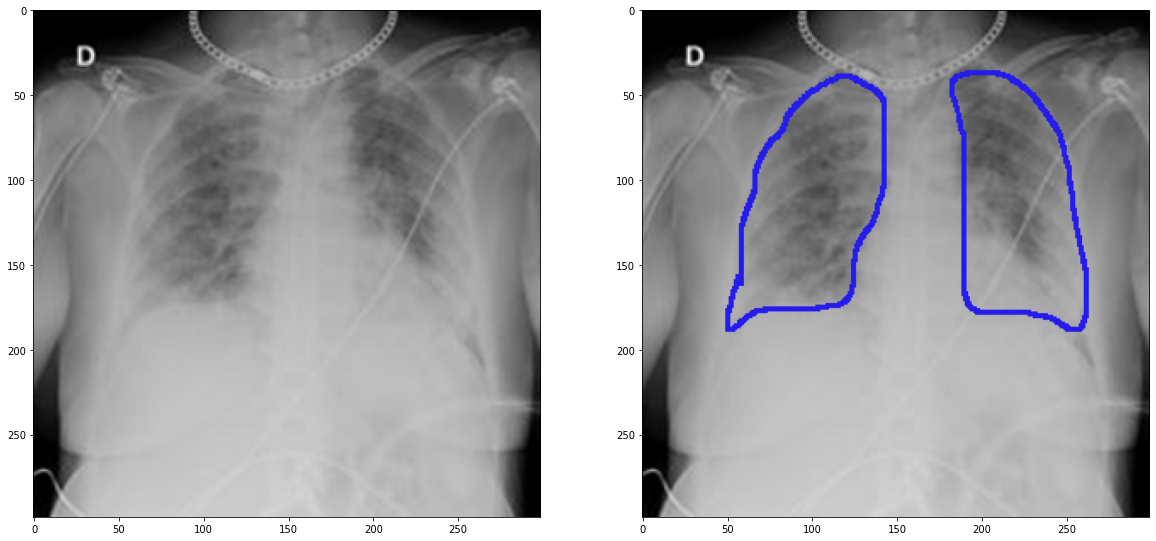

In [10]:
## plot both images :

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(co1010_orig)
ax[1].imshow(co1010_anno) ## [...,::-1]
## ax[1].imshow(co1010_anno[...,::-1]) ## for actual colors


## DIY quetion:
## how to get the annotaions of other images from kaggle?

## Obtaining the Difference

### think: *subtracting matrices*

In [11]:
## find the difference among the images :

diff = co1010_orig - co1010_anno
# diff = diff[:,:,0]

## obtain the grayscale image by computing the mean of the three color channels :
diff_mean = diff.mean(axis=2)

## this line has no meaning:
diff_sum = diff.sum(axis=2)


## DIY questions:
## what if you set axis = 1? 
## how to get the third axis? **)

## Thresholding the Difference

Text(0.5, 1.0, 'difference, thresholded')

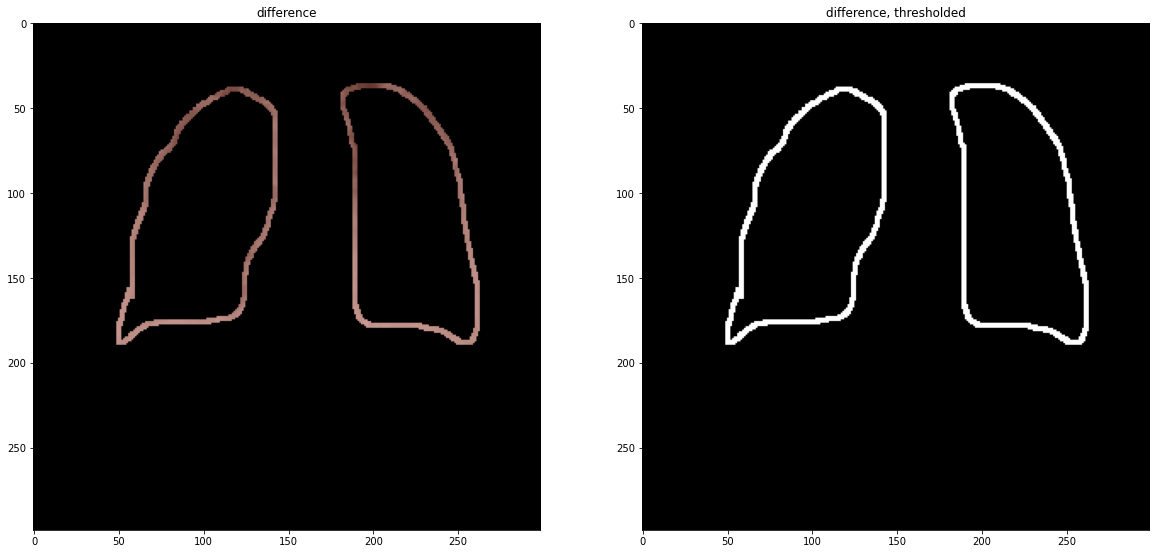

In [14]:
## set "low" values to zero, high values to 255.

diff_tr = cv2.threshold(diff,0,255,0) ## Tresholded
diff_tr = diff_tr[1]                  ## take only one layer!!


fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(diff[...,::-1])               ## Not Tresholded
ax[1].imshow(diff_tr)                      ## Tresholded

ax[0].set_title("difference")
ax[1].set_title("difference, thresholded")

## DIY questions:
## what do the numbers in the cv.threshold function reprsent?
## what if you skip second operation in this cell?


## Manipulation: Eroded edges

In [16]:
## A kernel is an equivalent of a painter's brush, or a magic wand 
## A kernel works on one pixel
## Python will apply the wand to the entire image.
## Your task is to tell the shape and size of the wand

kernel0 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

## Erosion is an operation to make all line thinner:

eroded  = cv2.erode(diff_tr.astype('uint8'), kernel0, iterations = 1)


## DIY question:
## what other shapes can you use in cv2.getStructuringElement function? <<<< GoogleME


## Manipulation: Dilated edges

In [17]:
## Dilation is the opposite of erosion:

dilated = cv2.dilate(diff_tr, kernel0, iterations=2)
dilated5 = cv2.dilate(diff_tr, kernel0, iterations=5) ## iterations is how many times the magic wand is applied to the entire image



Text(0.5, 1.0, 'difference, dilated by 5 pixels')

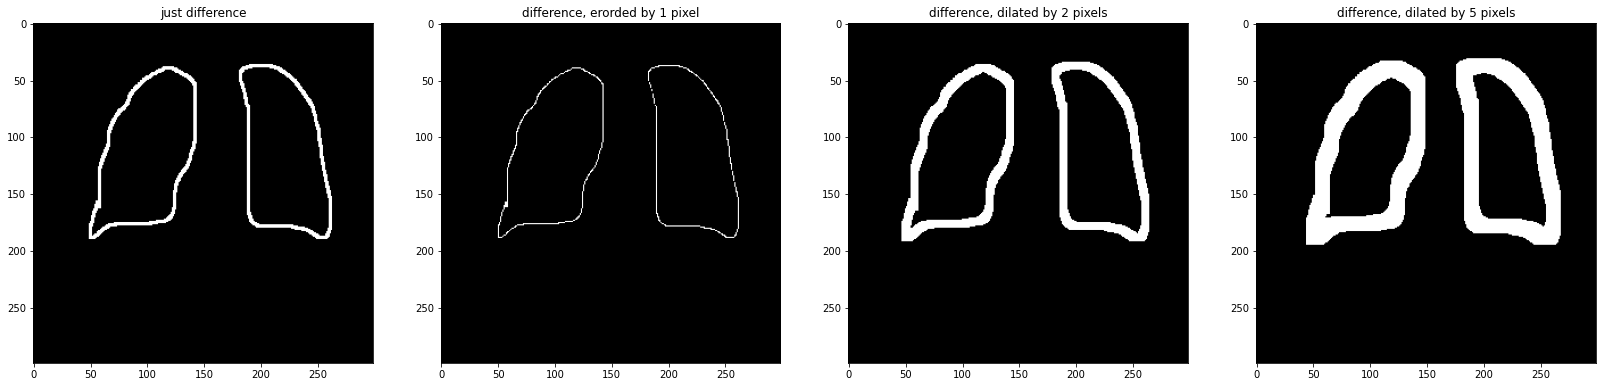

In [19]:
fig, ax = plt.subplots(1,4, figsize=(28,10))
ax[0].imshow(diff_tr)
ax[1].imshow(eroded)
ax[2].imshow(dilated)
ax[3].imshow(dilated5)

ax[0].set_title("just difference")
ax[1].set_title("difference, erorded by 1 pixel")
ax[2].set_title("difference, dilated by 2 pixels")
ax[3].set_title("difference, dilated by 5 pixels")

In [ ]:
## DIY question:
## what other operations require kernel?

## Floodfilling

In [17]:
height, width = co1010_orig.shape[:-1]

## A new mask for each floodfill opertion:

mask_ff0 = np.zeros((height + 2, width + 2), np.uint8)
diff_tr_ff = cv2.floodFill(diff_tr.astype('uint8').copy(), mask_ff0, (1,1), (255,255,255)) 

mask_ff1 = np.zeros((height + 2, width + 2), np.uint8)
eroded_ff = cv2.floodFill(eroded.astype('uint8').copy(), mask_ff1, (1,1), (255,255,255))

mask_ff2 = np.zeros((height + 2, width + 2), np.uint8)
dilated_ff = cv2.floodFill(dilated.astype('uint8').copy(), mask_ff2, (1,1), (255,255,255))

mask_ff3 = np.zeros((height + 2, width + 2), np.uint8)
dilated5_ff = cv2.floodFill(dilated5.astype('uint8').copy(), mask_ff3, (1,1), (255,255,255))

#### Floodfilling mask is NOT the final result.

## DIY question:
## Can I go without .copy() ? 
## Can I start at a different point?


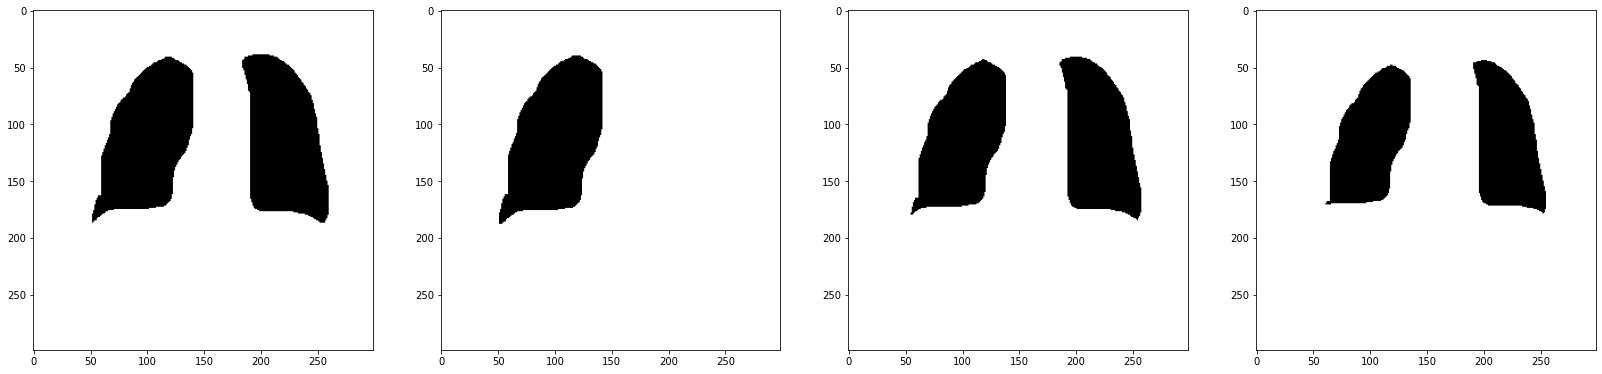

In [18]:
fig, ax = plt.subplots(1,4, figsize=(28,10))
ax[0].imshow(diff_tr_ff[1])
ax[1].imshow(eroded_ff[1])
ax[2].imshow(dilated_ff[1])
ax[3].imshow(dilated5_ff[1])

### Invert the masks

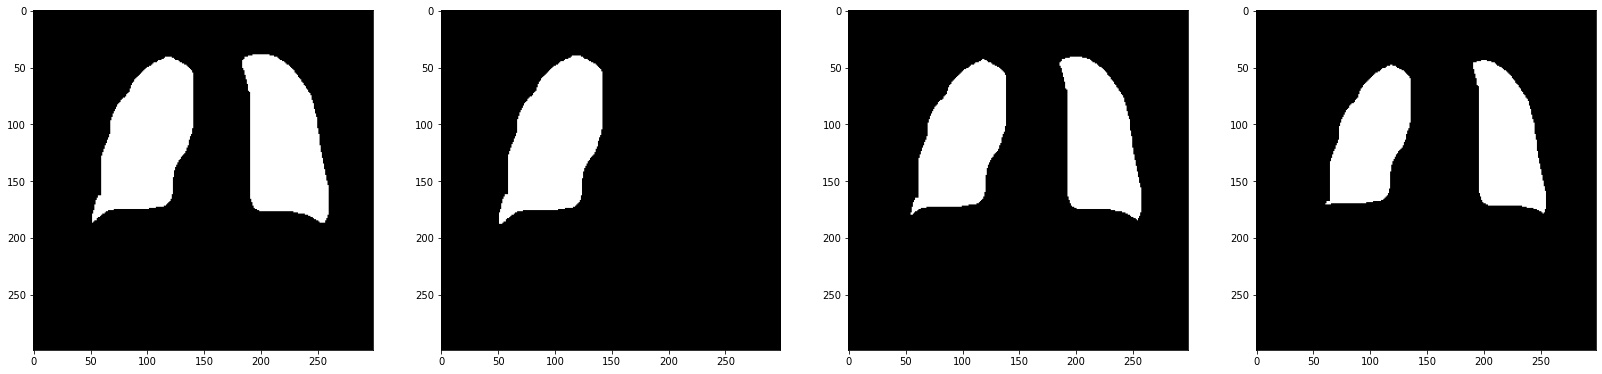

In [19]:
## swap 0 to 255 and vice-versa

diff_tr_ff  = 255 - diff_tr_ff[1]
eroded_ff   = 255 - eroded_ff[1]
dilated_ff  = 255 - dilated_ff[1]
dilated5_ff = 255 - dilated5_ff[1]
fig, ax = plt.subplots(1,4, figsize=(28,10))
ax[0].imshow(diff_tr_ff)
ax[1].imshow(eroded_ff)
ax[2].imshow(dilated_ff)
ax[3].imshow(dilated5_ff)

## Applying the Masks to the Original Image

In [29]:


masked0 = cv2.bitwise_and(co1010_orig, co1010_orig, mask=  diff_tr_ff[:,:,1])
masked1 = cv2.bitwise_and(co1010_orig, co1010_orig, mask=   eroded_ff[:,:,1])
masked2 = cv2.bitwise_and(co1010_orig, co1010_orig, mask=  dilated_ff[:,:,1])
masked3 = cv2.bitwise_and(co1010_orig, co1010_orig, mask= dilated5_ff[:,:,1])



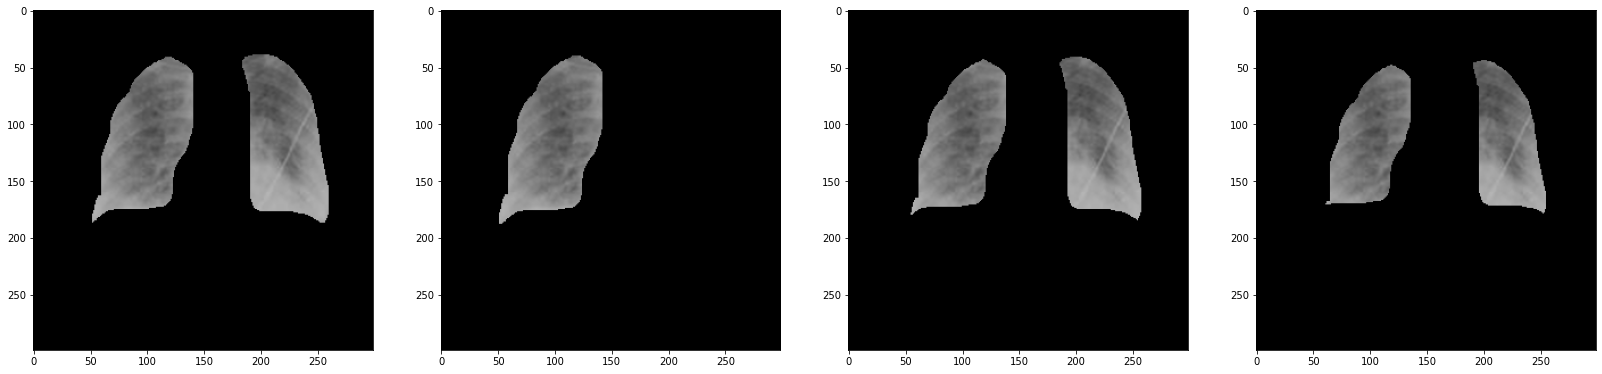

In [30]:
fig, ax = plt.subplots(1,4, figsize=(28,10))
ax[0].imshow(masked0)
ax[1].imshow(masked1)
ax[2].imshow(masked2)
ax[3].imshow(masked3)


## DIY question:
## could I have used a for loop here?

## Dividing into Patches

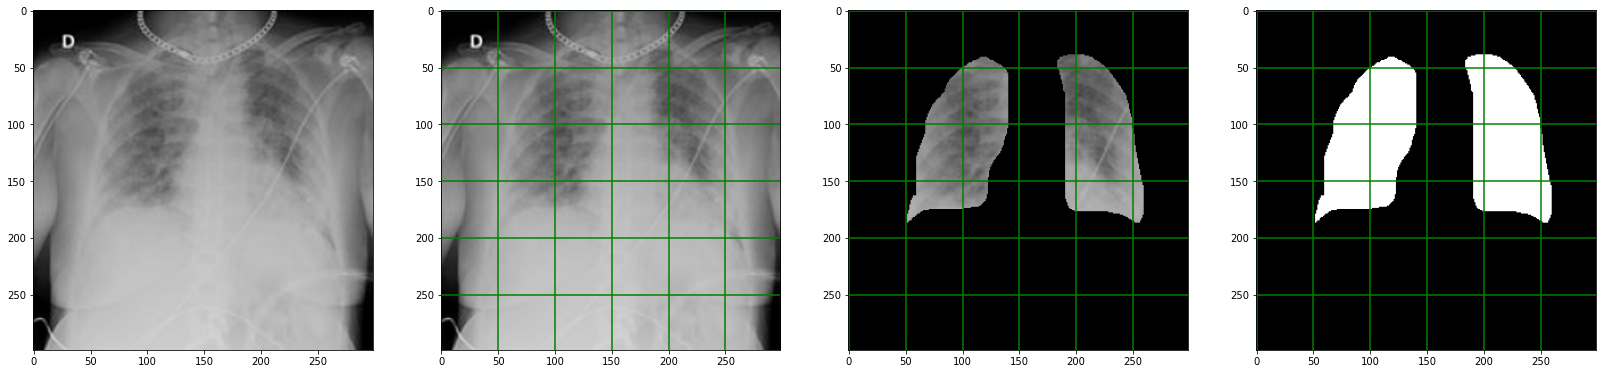

In [23]:
### This cell is only illustrative.
### We are NOT going to "draw lines on the images".

fig, ax = plt.subplots(1,4, figsize=(28,10))
ax[0].imshow(co1010_orig)
ax[1].imshow(co1010_orig)
ax[2].imshow(masked0)
ax[3].imshow(diff_tr_ff)

for j in range(1,4):
    for i in range(6):
        ax[j].axhline(50 * i, c="green")
        ax[j].axvline(50 * i, c="green")

In [19]:
## mask = getmask(image, annotation) ## DIY!!


image  = co1010_orig       ## original image
mask   = diff_tr_ff[:,:,1] ## mask
masked = masked0           ## masked image


height, width = co1010_orig.shape[:-1]
path_size = 16
step_size = 16  ## setting to 8 will produce overlapping patches

patch_directory = os.path.join("..","data","COVID-19_Radiography_Dataset","patches")

i = 0
while i <  height - 128:
    j = 0
    while j < width - 128:
        patch_0 = image[i:path_size+i, j:path_size+j, :] ###  ":" means "all channels"
        patch_m = mask [i:path_size+i, j:path_size+j   ] 

        number_of_pixels_from_ROI = sum( sum( (patch_m // 255) ) )    ##try only one "sum" and see what happens
        ratio_of_pixels_from_ROI  = number_of_pixels_from_ROI // (path_size * path_size)
        
        if ratio_of_pixels_from_ROI > 0.25:  ### if a patch overlaps with ROI by at least 25%
            sample_name = image_file_name.split(".")[0]
            patch_file_name = sample_name + "_" + str(i) + "_" + str(j) + ".tif"
            patch_file_dir = os.path.join(patch_directory, patch_file_name)
            cv2.imwrite(patch_file_dir, patch_0) 

        j += step_size
    i += step_size

In [20]:
os.listdir(patch_directory)

['COVID-1010_112_112.tif',
 'COVID-1010_112_80.tif',
 'COVID-1010_112_96.tif',
 'COVID-1010_128_64.tif',
 'COVID-1010_128_80.tif',
 'COVID-1010_128_96.tif',
 'COVID-1010_144_64.tif',
 'COVID-1010_144_80.tif',
 'COVID-1010_144_96.tif',
 'COVID-1010_48_112.tif',
 'COVID-1010_64_112.tif',
 'COVID-1010_64_96.tif',
 'COVID-1010_80_112.tif',
 'COVID-1010_80_80.tif',
 'COVID-1010_80_96.tif',
 'COVID-1010_96_112.tif',
 'COVID-1010_96_80.tif',
 'COVID-1010_96_96.tif',
 'Thumbs.db']

In [ ]:
## DIY: 
## how to produce the patches for each images in the dataset?
## how to store all of the patches?